In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('combined_dataset.csv')
data.head()

,room number,district,price,construction type,name_of_complex,built_year,floor,area,condition,sanuzel,...,phone,internet,parking,furniture,flooring,ceiling height,security,was_dormitory,change,link_to_data
0,3,"Алматы, Алмалинский р-н",69990000,монолитный,Nomad,2021,5 из 12,"95 м², Площадь кухни — 15 м²",хорошее,совмещенный,...,NaN,ADSL,NaN,полностью,ламинат,2.7 м,"видеодомофон, кодовый замок, консьерж, охрана,...",нет,Не интересует,https://krisha.kz/a/show/688120458
1,2,"Алматы, Медеуский р-н",27500000,монолитный,NaN,2019,5 из 5,50 м²,хорошее,NaN,...,отдельный,оптика,NaN,без мебели,ламинат,2.7 м,"домофон, видеонаблюдение",нет,NaN,https://krisha.kz/a/show/688923892
2,2,"Алматы, Бостандыкский р-н",46000000,монолитный,Etasa Residence,2023,5 из 16,50 м²,черновая отделка,NaN,...,NaN,NaN,паркинг,NaN,NaN,3 м,"охрана, видеонаблюдение, домофон",нет,Не интересует,https://krisha.kz/a/show/687407613
3,4,"Алматы, Бостандыкский р-н",198000000,монолитный,Тан Нуры,2013,2 из 6,180 м²,хорошее,2 с/у и более,...,NaN,NaN,паркинг,полностью,ламинат,3 м,"домофон, охрана, видеонаблюдение",нет,Не интересует,https://krisha.kz/a/show/685954358
4,3,"Алматы, Бостандыкский р-н",150000000,монолитный,Miras Park,2016,2 из 6,120.2 м²,хорошее,2 с/у и более,...,есть возможность подключения,оптика,паркинг,полностью,ламинат,3.3 м,"охрана, кодовый замок, видеонаблюдение, видеод...",нет,NaN,https://krisha.kz/a/show/686803026


In [3]:
data.iloc[1].values

array([2, 'Алматы, Медеуский р-н', 27500000, 'монолитный', nan, 2019,
       '5 из 5', '50 м²', 'хорошее', nan, nan, nan, 'металлическая',
       'отдельный', 'оптика', nan, 'без мебели', 'ламинат', '2.7 м',
       'домофон, видеонаблюдение', 'нет', nan,
       'https://krisha.kz/a/show/688923892'], dtype=object)

In [4]:
data['floor'] = data['floor'].str.extract(r'(\d+)').astype(float)
data['ceiling height'] = data['ceiling height'].str.extract(r'([\d.]+)').astype(float)

In [5]:
data.head()

,room number,district,price,construction type,name_of_complex,built_year,floor,area,condition,sanuzel,...,phone,internet,parking,furniture,flooring,ceiling height,security,was_dormitory,change,link_to_data
0,3,"Алматы, Алмалинский р-н",69990000,монолитный,Nomad,2021,5.0,"95 м², Площадь кухни — 15 м²",хорошее,совмещенный,...,NaN,ADSL,NaN,полностью,ламинат,2.7,"видеодомофон, кодовый замок, консьерж, охрана,...",нет,Не интересует,https://krisha.kz/a/show/688120458
1,2,"Алматы, Медеуский р-н",27500000,монолитный,NaN,2019,5.0,50 м²,хорошее,NaN,...,отдельный,оптика,NaN,без мебели,ламинат,2.7,"домофон, видеонаблюдение",нет,NaN,https://krisha.kz/a/show/688923892
2,2,"Алматы, Бостандыкский р-н",46000000,монолитный,Etasa Residence,2023,5.0,50 м²,черновая отделка,NaN,...,NaN,NaN,паркинг,NaN,NaN,3.0,"охрана, видеонаблюдение, домофон",нет,Не интересует,https://krisha.kz/a/show/687407613
3,4,"Алматы, Бостандыкский р-н",198000000,монолитный,Тан Нуры,2013,2.0,180 м²,хорошее,2 с/у и более,...,NaN,NaN,паркинг,полностью,ламинат,3.0,"домофон, охрана, видеонаблюдение",нет,Не интересует,https://krisha.kz/a/show/685954358
4,3,"Алматы, Бостандыкский р-н",150000000,монолитный,Miras Park,2016,2.0,120.2 м²,хорошее,2 с/у и более,...,есть возможность подключения,оптика,паркинг,полностью,ламинат,3.3,"охрана, кодовый замок, видеонаблюдение, видеод...",нет,NaN,https://krisha.kz/a/show/686803026


In [6]:
import re

total_area, kitchen_area, living_area = [],[],[]

for search in data['area']:
    numbers = re.findall(r'\d+\.\d+|\d+', search)
    numbers = [float(num) if '.' in num else int(num) for num in numbers]

    if len(numbers) > 1:
        total_area.append(numbers[0])
        living_area.append(numbers[1] if len(numbers) > 2 else numbers[0] - numbers[1])
        kitchen_area.append(numbers[2] if len(numbers) > 2 else numbers[1])

    else:
        total_area.append(numbers[0])
        living_area.append(0)
        kitchen_area.append(0)

In [7]:
data['total_area'] = total_area
data['living_area'] = living_area
data['kitchen_area'] = kitchen_area

In [8]:
data.head()

,room number,district,price,construction type,name_of_complex,built_year,floor,area,condition,sanuzel,...,furniture,flooring,ceiling height,security,was_dormitory,change,link_to_data,total_area,living_area,kitchen_area
0,3,"Алматы, Алмалинский р-н",69990000,монолитный,Nomad,2021,5.0,"95 м², Площадь кухни — 15 м²",хорошее,совмещенный,...,полностью,ламинат,2.7,"видеодомофон, кодовый замок, консьерж, охрана,...",нет,Не интересует,https://krisha.kz/a/show/688120458,95.0,80.0,15.0
1,2,"Алматы, Медеуский р-н",27500000,монолитный,NaN,2019,5.0,50 м²,хорошее,NaN,...,без мебели,ламинат,2.7,"домофон, видеонаблюдение",нет,NaN,https://krisha.kz/a/show/688923892,50.0,0.0,0.0
2,2,"Алматы, Бостандыкский р-н",46000000,монолитный,Etasa Residence,2023,5.0,50 м²,черновая отделка,NaN,...,NaN,NaN,3.0,"охрана, видеонаблюдение, домофон",нет,Не интересует,https://krisha.kz/a/show/687407613,50.0,0.0,0.0
3,4,"Алматы, Бостандыкский р-н",198000000,монолитный,Тан Нуры,2013,2.0,180 м²,хорошее,2 с/у и более,...,полностью,ламинат,3.0,"домофон, охрана, видеонаблюдение",нет,Не интересует,https://krisha.kz/a/show/685954358,180.0,0.0,0.0
4,3,"Алматы, Бостандыкский р-н",150000000,монолитный,Miras Park,2016,2.0,120.2 м²,хорошее,2 с/у и более,...,полностью,ламинат,3.3,"охрана, кодовый замок, видеонаблюдение, видеод...",нет,NaN,https://krisha.kz/a/show/686803026,120.2,0.0,0.0


In [9]:
data['was_dormitory'].fillna('нет', inplace=True)

In [10]:
data['was_dormitory'] = data['was_dormitory'].apply(lambda x: 1 if x == 'да' else 0)

In [11]:
data.dropna(subset=['condition'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21376 entries, 0 to 27775
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   room number        21376 non-null  int64  
 1   district           21376 non-null  object 
 2   price              21376 non-null  int64  
 3   construction type  20980 non-null  object 
 4   name_of_complex    9920 non-null   object 
 5   built_year         21376 non-null  int64  
 6   floor              21250 non-null  float64
 7   area               21376 non-null  object 
 8   condition          21376 non-null  object 
 9   sanuzel            7982 non-null   object 
 10  balcony            13071 non-null  object 
 11  balcony_glass      10579 non-null  object 
 12  door               15546 non-null  object 
 13  phone              9196 non-null   object 
 14  internet           11612 non-null  object 
 15  parking            13746 non-null  object 
 16  furniture          145

In [12]:
pd.get_dummies(data.condition)

,свободная планировка,среднее,требует ремонта,хорошее,черновая отделка
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
27769,0,0,0,1,0
27770,0,0,0,1,0
27772,0,0,0,1,0
27773,0,0,0,1,0


In [13]:
data = data.join(pd.get_dummies(data.condition)).drop(['condition'], axis=1)

In [14]:
data.head()

,room number,district,price,construction type,name_of_complex,built_year,floor,area,sanuzel,balcony,...,change,link_to_data,total_area,living_area,kitchen_area,свободная планировка,среднее,требует ремонта,хорошее,черновая отделка
0,3,"Алматы, Алмалинский р-н",69990000,монолитный,Nomad,2021,5.0,"95 м², Площадь кухни — 15 м²",совмещенный,NaN,...,Не интересует,https://krisha.kz/a/show/688120458,95.0,80.0,15.0,0,0,0,1,0
1,2,"Алматы, Медеуский р-н",27500000,монолитный,NaN,2019,5.0,50 м²,NaN,NaN,...,NaN,https://krisha.kz/a/show/688923892,50.0,0.0,0.0,0,0,0,1,0
2,2,"Алматы, Бостандыкский р-н",46000000,монолитный,Etasa Residence,2023,5.0,50 м²,NaN,NaN,...,Не интересует,https://krisha.kz/a/show/687407613,50.0,0.0,0.0,0,0,0,0,1
3,4,"Алматы, Бостандыкский р-н",198000000,монолитный,Тан Нуры,2013,2.0,180 м²,2 с/у и более,NaN,...,Не интересует,https://krisha.kz/a/show/685954358,180.0,0.0,0.0,0,0,0,1,0
4,3,"Алматы, Бостандыкский р-н",150000000,монолитный,Miras Park,2016,2.0,120.2 м²,2 с/у и более,лоджия,...,NaN,https://krisha.kz/a/show/686803026,120.2,0.0,0.0,0,0,0,1,0


In [15]:
pd.get_dummies(data.change)

,Возможен обмен,Не интересует
0,0,1
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
27769,0,1
27770,0,1
27772,0,0
27773,0,0


In [16]:
data['change'].fillna('Не интересует', inplace=True)

In [17]:
data.head()

,room number,district,price,construction type,name_of_complex,built_year,floor,area,sanuzel,balcony,...,change,link_to_data,total_area,living_area,kitchen_area,свободная планировка,среднее,требует ремонта,хорошее,черновая отделка
0,3,"Алматы, Алмалинский р-н",69990000,монолитный,Nomad,2021,5.0,"95 м², Площадь кухни — 15 м²",совмещенный,NaN,...,Не интересует,https://krisha.kz/a/show/688120458,95.0,80.0,15.0,0,0,0,1,0
1,2,"Алматы, Медеуский р-н",27500000,монолитный,NaN,2019,5.0,50 м²,NaN,NaN,...,Не интересует,https://krisha.kz/a/show/688923892,50.0,0.0,0.0,0,0,0,1,0
2,2,"Алматы, Бостандыкский р-н",46000000,монолитный,Etasa Residence,2023,5.0,50 м²,NaN,NaN,...,Не интересует,https://krisha.kz/a/show/687407613,50.0,0.0,0.0,0,0,0,0,1
3,4,"Алматы, Бостандыкский р-н",198000000,монолитный,Тан Нуры,2013,2.0,180 м²,2 с/у и более,NaN,...,Не интересует,https://krisha.kz/a/show/685954358,180.0,0.0,0.0,0,0,0,1,0
4,3,"Алматы, Бостандыкский р-н",150000000,монолитный,Miras Park,2016,2.0,120.2 м²,2 с/у и более,лоджия,...,Не интересует,https://krisha.kz/a/show/686803026,120.2,0.0,0.0,0,0,0,1,0


In [18]:
data = data.join(pd.get_dummies(data.change)).drop(['change'], axis=1)

In [19]:
data.iloc[15:20]

,room number,district,price,construction type,name_of_complex,built_year,floor,area,sanuzel,balcony,...,total_area,living_area,kitchen_area,свободная планировка,среднее,требует ремонта,хорошее,черновая отделка,Возможен обмен,Не интересует
19,4,"Алматы, Бостандыкский р-н",110000000,монолитный,Sholpan City,2021,6.0,"133.2 м², жилая — 125 м², Площадь кухни — 11 м²",2 с/у и более,балкон,...,133.2,125.0,11.0,0,0,0,1,0,0,1
20,3,"Алматы, Бостандыкский р-н",64186000,монолитный,Riviera,2019,2.0,95.8 м²,2 с/у и более,лоджия,...,95.8,0.0,0.0,0,0,0,0,1,0,1
21,1,"Алматы, Жетысуский р-н",10500000,иное,NaN,2016,1.0,21.1 м²,NaN,NaN,...,21.1,0.0,0.0,0,0,0,1,0,0,1
22,1,"Алматы, Бостандыкский р-н",30000000,панельный,NaN,1996,9.0,"40 м², Площадь кухни — 9 м²",NaN,балкон,...,40.0,31.0,9.0,0,0,0,1,0,0,1
25,3,"Алматы, Жетысуский р-н",65000000,монолитный,RAIYMBEK,2023,5.0,118 м²,2 с/у и более,NaN,...,118.0,0.0,0.0,0,0,0,0,1,0,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21376 entries, 0 to 27775
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room number           21376 non-null  int64  
 1   district              21376 non-null  object 
 2   price                 21376 non-null  int64  
 3   construction type     20980 non-null  object 
 4   name_of_complex       9920 non-null   object 
 5   built_year            21376 non-null  int64  
 6   floor                 21250 non-null  float64
 7   area                  21376 non-null  object 
 8   sanuzel               7982 non-null   object 
 9   balcony               13071 non-null  object 
 10  balcony_glass         10579 non-null  object 
 11  door                  15546 non-null  object 
 12  phone                 9196 non-null   object 
 13  internet              11612 non-null  object 
 14  parking               13746 non-null  object 
 15  furniture          

In [21]:
pd.get_dummies(data.door)

,бронированная,деревянная,металлическая
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
27769,1,0,0
27770,0,0,0
27772,0,0,1
27773,0,0,1


In [22]:
data['door'].fillna('металлическая', inplace=True)

In [23]:
data = data.join(pd.get_dummies(data.door)).drop(['door'], axis=1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21376 entries, 0 to 27775
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room number           21376 non-null  int64  
 1   district              21376 non-null  object 
 2   price                 21376 non-null  int64  
 3   construction type     20980 non-null  object 
 4   name_of_complex       9920 non-null   object 
 5   built_year            21376 non-null  int64  
 6   floor                 21250 non-null  float64
 7   area                  21376 non-null  object 
 8   sanuzel               7982 non-null   object 
 9   balcony               13071 non-null  object 
 10  balcony_glass         10579 non-null  object 
 11  phone                 9196 non-null   object 
 12  internet              11612 non-null  object 
 13  parking               13746 non-null  object 
 14  furniture             14535 non-null  object 
 15  flooring           

In [25]:
data.dropna(thresh=11_000, axis=1, inplace=True)
data.drop(columns=['link_to_data'], inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21376 entries, 0 to 27775
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room number           21376 non-null  int64  
 1   district              21376 non-null  object 
 2   price                 21376 non-null  int64  
 3   construction type     20980 non-null  object 
 4   built_year            21376 non-null  int64  
 5   floor                 21250 non-null  float64
 6   area                  21376 non-null  object 
 7   balcony               13071 non-null  object 
 8   internet              11612 non-null  object 
 9   parking               13746 non-null  object 
 10  furniture             14535 non-null  object 
 11  flooring              14009 non-null  object 
 12  ceiling height        15716 non-null  float64
 13  security              15295 non-null  object 
 14  was_dormitory         21376 non-null  int64  
 15  total_area         

In [27]:
data = data.join(pd.get_dummies(data.district)).drop(['district'], axis=1)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21376 entries, 0 to 27775
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   room number                21376 non-null  int64  
 1   price                      21376 non-null  int64  
 2   construction type          20980 non-null  object 
 3   built_year                 21376 non-null  int64  
 4   floor                      21250 non-null  float64
 5   area                       21376 non-null  object 
 6   balcony                    13071 non-null  object 
 7   internet                   11612 non-null  object 
 8   parking                    13746 non-null  object 
 9   furniture                  14535 non-null  object 
 10  flooring                   14009 non-null  object 
 11  ceiling height             15716 non-null  float64
 12  security                   15295 non-null  object 
 13  was_dormitory              21376 non-null  int

In [29]:
data.dropna(subset=['construction type'], inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20980 entries, 0 to 27775
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   room number                20980 non-null  int64  
 1   price                      20980 non-null  int64  
 2   construction type          20980 non-null  object 
 3   built_year                 20980 non-null  int64  
 4   floor                      20864 non-null  float64
 5   area                       20980 non-null  object 
 6   balcony                    13033 non-null  object 
 7   internet                   11427 non-null  object 
 8   parking                    13600 non-null  object 
 9   furniture                  14299 non-null  object 
 10  flooring                   13769 non-null  object 
 11  ceiling height             15539 non-null  float64
 12  security                   15043 non-null  object 
 13  was_dormitory              20980 non-null  int

In [31]:
data.head()

,room number,price,construction type,built_year,floor,area,balcony,internet,parking,furniture,...,Алматы,"Алматы, Алатауский р-н","Алматы, Алмалинский р-н","Алматы, Ауэзовский р-н","Алматы, Бостандыкский р-н","Алматы, Жетысуский р-н","Алматы, Медеуский р-н","Алматы, Наурызбайский р-н","Алматы, Турксибский р-н","Бесагаш, Алматинская обл."
0,3,69990000,монолитный,2021,5.0,"95 м², Площадь кухни — 15 м²",NaN,ADSL,NaN,полностью,...,0,0,1,0,0,0,0,0,0,0
1,2,27500000,монолитный,2019,5.0,50 м²,NaN,оптика,NaN,без мебели,...,0,0,0,0,0,0,1,0,0,0
2,2,46000000,монолитный,2023,5.0,50 м²,NaN,NaN,паркинг,NaN,...,0,0,0,0,1,0,0,0,0,0
3,4,198000000,монолитный,2013,2.0,180 м²,NaN,NaN,паркинг,полностью,...,0,0,0,0,1,0,0,0,0,0
4,3,150000000,монолитный,2016,2.0,120.2 м²,лоджия,оптика,паркинг,полностью,...,0,0,0,0,1,0,0,0,0,0


In [32]:
pd.get_dummies(data.security)

,видеодомофон,"видеодомофон, видеонаблюдение","видеодомофон, видеонаблюдение, домофон","видеодомофон, видеонаблюдение, домофон, кодовый замок, консьерж, охрана","видеодомофон, видеонаблюдение, домофон, кодовый замок, охрана","видеодомофон, видеонаблюдение, домофон, кодовый замок, охрана, сигнализация, консьерж","видеодомофон, видеонаблюдение, домофон, консьерж","видеодомофон, видеонаблюдение, домофон, решетки на окнах","видеодомофон, видеонаблюдение, кодовый замок, домофон","видеодомофон, видеонаблюдение, кодовый замок, консьерж, домофон, охрана, сигнализация",...,"сигнализация, охрана, кодовый замок, видеонаблюдение, домофон","сигнализация, охрана, кодовый замок, домофон, видеонаблюдение","сигнализация, охрана, консьерж, видеонаблюдение, домофон","сигнализация, охрана, решетки на окнах, видеодомофон, консьерж, кодовый замок, домофон, видеонаблюдение","сигнализация, охрана, решетки на окнах, домофон, видеонаблюдение","сигнализация, решетки на окнах, видеодомофон, охрана, видеонаблюдение","сигнализация, решетки на окнах, домофон","сигнализация, решетки на окнах, домофон, видеонаблюдение","сигнализация, решетки на окнах, охрана, домофон","сигнализация, решетки на окнах, охрана, домофон, видеонаблюдение"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data.drop(columns=['security'], inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20980 entries, 0 to 27775
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   room number                20980 non-null  int64  
 1   price                      20980 non-null  int64  
 2   construction type          20980 non-null  object 
 3   built_year                 20980 non-null  int64  
 4   floor                      20864 non-null  float64
 5   area                       20980 non-null  object 
 6   balcony                    13033 non-null  object 
 7   internet                   11427 non-null  object 
 8   parking                    13600 non-null  object 
 9   furniture                  14299 non-null  object 
 10  flooring                   13769 non-null  object 
 11  ceiling height             15539 non-null  float64
 12  was_dormitory              20980 non-null  int64  
 13  total_area                 20980 non-null  flo

In [35]:
data = data.join(pd.get_dummies(data['construction type'])).drop(['construction type'], axis=1)

In [36]:
data.drop(columns=['area'], inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20980 entries, 0 to 27775
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   room number                20980 non-null  int64  
 1   price                      20980 non-null  int64  
 2   built_year                 20980 non-null  int64  
 3   floor                      20864 non-null  float64
 4   balcony                    13033 non-null  object 
 5   internet                   11427 non-null  object 
 6   parking                    13600 non-null  object 
 7   furniture                  14299 non-null  object 
 8   flooring                   13769 non-null  object 
 9   ceiling height             15539 non-null  float64
 10  was_dormitory              20980 non-null  int64  
 11  total_area                 20980 non-null  float64
 12  living_area                20980 non-null  float64
 13  kitchen_area               20980 non-null  flo

In [38]:
ceiling_height = data['ceiling height'].mean()
ceiling_height

2.8660177617607205

In [39]:
data['ceiling height'].fillna(ceiling_height, inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20980 entries, 0 to 27775
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   room number                20980 non-null  int64  
 1   price                      20980 non-null  int64  
 2   built_year                 20980 non-null  int64  
 3   floor                      20864 non-null  float64
 4   balcony                    13033 non-null  object 
 5   internet                   11427 non-null  object 
 6   parking                    13600 non-null  object 
 7   furniture                  14299 non-null  object 
 8   flooring                   13769 non-null  object 
 9   ceiling height             20980 non-null  float64
 10  was_dormitory              20980 non-null  int64  
 11  total_area                 20980 non-null  float64
 12  living_area                20980 non-null  float64
 13  kitchen_area               20980 non-null  flo

In [41]:
data['floor'].fillna(1.0, inplace=True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20980 entries, 0 to 27775
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   room number                20980 non-null  int64  
 1   price                      20980 non-null  int64  
 2   built_year                 20980 non-null  int64  
 3   floor                      20980 non-null  float64
 4   balcony                    13033 non-null  object 
 5   internet                   11427 non-null  object 
 6   parking                    13600 non-null  object 
 7   furniture                  14299 non-null  object 
 8   flooring                   13769 non-null  object 
 9   ceiling height             20980 non-null  float64
 10  was_dormitory              20980 non-null  int64  
 11  total_area                 20980 non-null  float64
 12  living_area                20980 non-null  float64
 13  kitchen_area               20980 non-null  flo

In [43]:
pd.get_dummies(data['balcony'])

,балкон,балкон и лоджия,лоджия,несколько балконов или лоджий
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,1,0
...,...,...,...,...
27769,0,0,1,0
27770,0,0,0,0
27772,0,0,1,0
27773,0,0,0,0


In [44]:
data['balcony'].fillna('нет_balcony', inplace=True)

In [45]:
data = data.join(pd.get_dummies(data['balcony'])).drop(['balcony'], axis=1)

In [46]:
data['furniture'].fillna('без мебели', inplace=True)

In [47]:
data = data.join(pd.get_dummies(data.furniture)).drop('furniture', axis=1)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20980 entries, 0 to 27775
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   room number                    20980 non-null  int64  
 1   price                          20980 non-null  int64  
 2   built_year                     20980 non-null  int64  
 3   floor                          20980 non-null  float64
 4   internet                       11427 non-null  object 
 5   parking                        13600 non-null  object 
 6   flooring                       13769 non-null  object 
 7   ceiling height                 20980 non-null  float64
 8   was_dormitory                  20980 non-null  int64  
 9   total_area                     20980 non-null  float64
 10  living_area                    20980 non-null  float64
 11  kitchen_area                   20980 non-null  float64
 12  свободная планировка           20980 non-null 

In [49]:
data['parking'].fillna('нет_parking', inplace=True)

In [50]:
data = data.join(pd.get_dummies(data.parking)).drop(['parking'], axis=1)

In [51]:
data.drop(columns=['flooring'], inplace=True)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20980 entries, 0 to 27775
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   room number                    20980 non-null  int64  
 1   price                          20980 non-null  int64  
 2   built_year                     20980 non-null  int64  
 3   floor                          20980 non-null  float64
 4   internet                       11427 non-null  object 
 5   ceiling height                 20980 non-null  float64
 6   was_dormitory                  20980 non-null  int64  
 7   total_area                     20980 non-null  float64
 8   living_area                    20980 non-null  float64
 9   kitchen_area                   20980 non-null  float64
 10  свободная планировка           20980 non-null  uint8  
 11  среднее                        20980 non-null  uint8  
 12  требует ремонта                20980 non-null 

In [53]:
data['internet'].fillna('проводной', inplace=True)
data = data.join(pd.get_dummies(data.internet)).drop(['internet'], axis=1)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20980 entries, 0 to 27775
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   room number                    20980 non-null  int64  
 1   price                          20980 non-null  int64  
 2   built_year                     20980 non-null  int64  
 3   floor                          20980 non-null  float64
 4   ceiling height                 20980 non-null  float64
 5   was_dormitory                  20980 non-null  int64  
 6   total_area                     20980 non-null  float64
 7   living_area                    20980 non-null  float64
 8   kitchen_area                   20980 non-null  float64
 9   свободная планировка           20980 non-null  uint8  
 10  среднее                        20980 non-null  uint8  
 11  требует ремонта                20980 non-null  uint8  
 12  хорошее                        20980 non-null 

<AxesSubplot:>

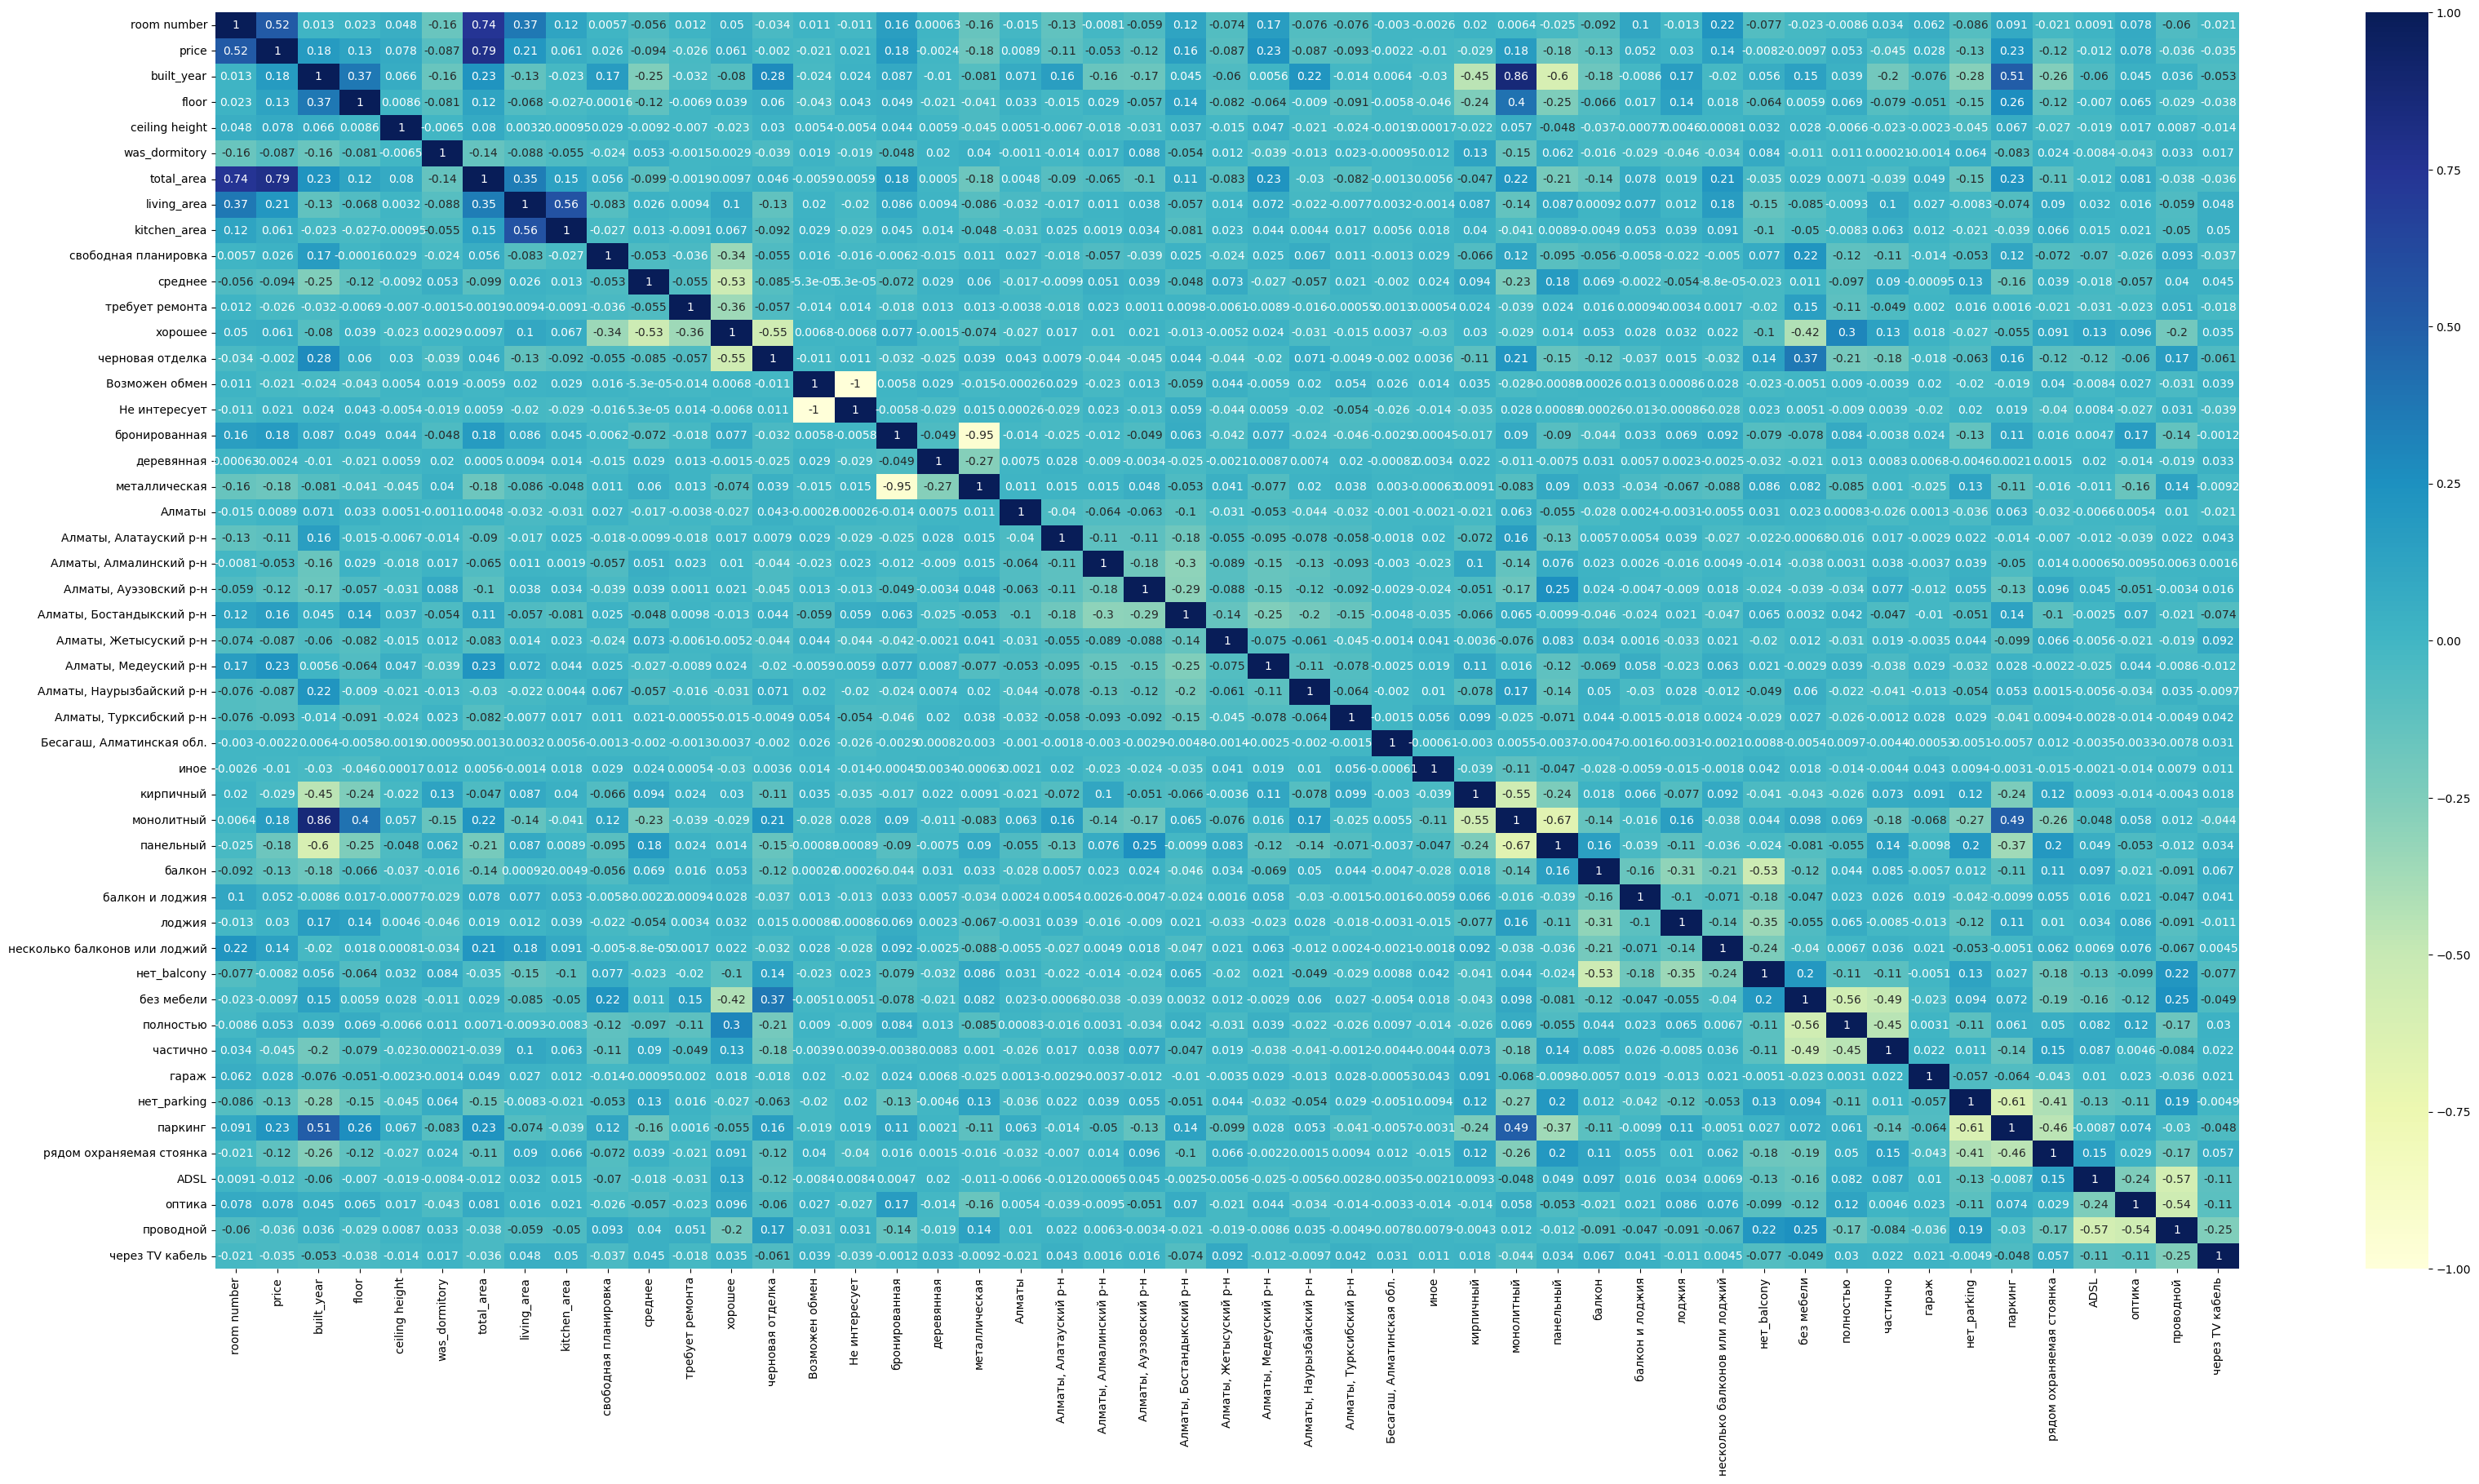

In [55]:
plt.figure(figsize=(40, 20))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

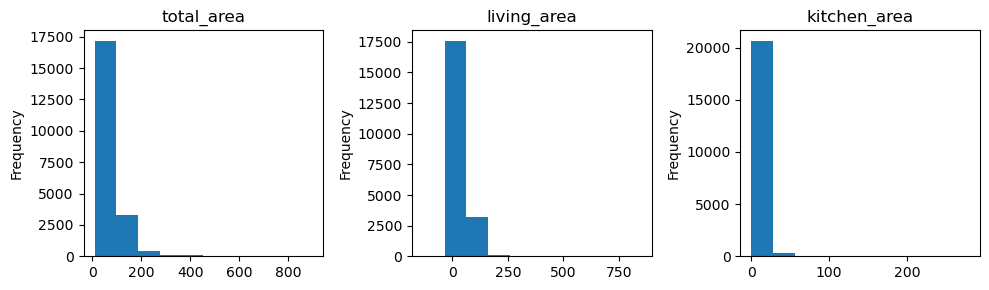

In [56]:
columns_to_plot = ['total_area', 'living_area', 'kitchen_area']

fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(10, 3))

for i, col in enumerate(columns_to_plot):
    data[col].plot(kind='hist', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

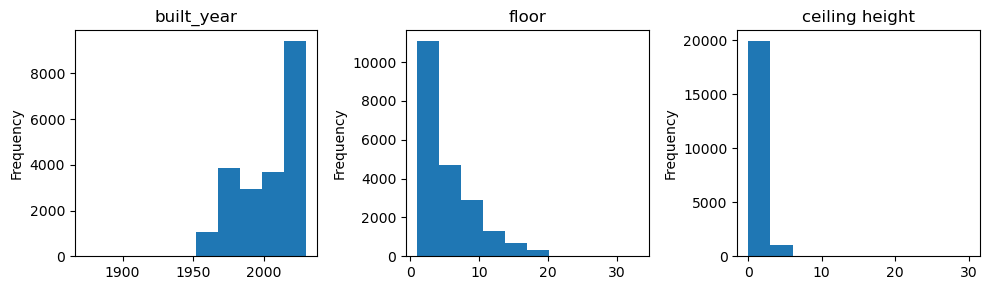

In [57]:
columns_to_plot = ['built_year', 'floor', 'ceiling height']

fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(10, 3))

for i, col in enumerate(columns_to_plot):
    data[col].plot(kind='hist', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [58]:
data['floor'] = np.log(data['floor'] + 1)
data['total_area'] = np.log(data['total_area'] + 1)

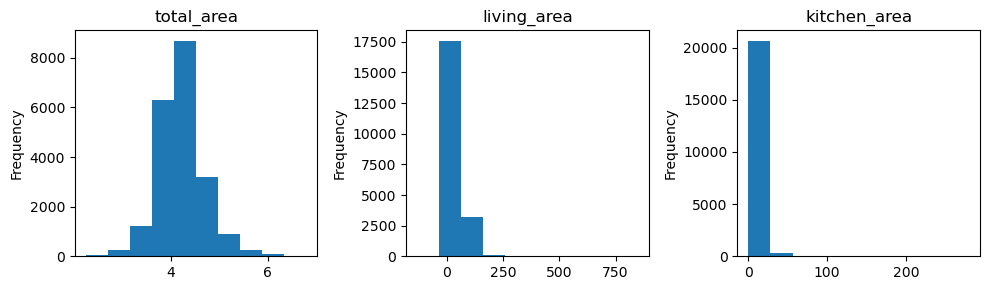

In [59]:
columns_to_plot = ['total_area', 'living_area', 'kitchen_area']

fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(10, 3))

for i, col in enumerate(columns_to_plot):
    data[col].plot(kind='hist', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

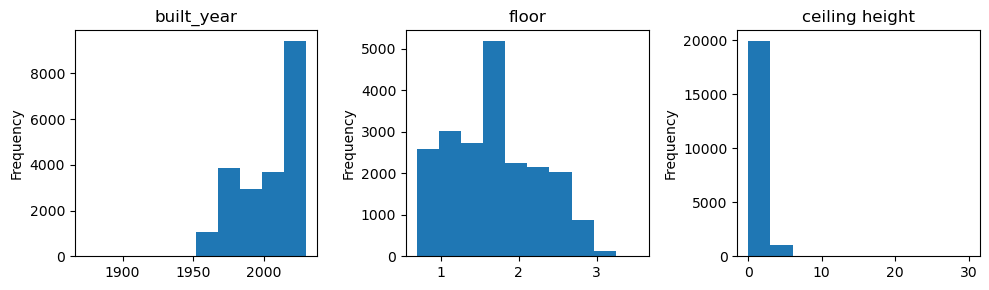

In [60]:
columns_to_plot = ['built_year', 'floor', 'ceiling height']

fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(10, 3))

for i, col in enumerate(columns_to_plot):
    data[col].plot(kind='hist', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [61]:
#LinearRegression
X = data.drop(['price'], axis=1)
y = data['price']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [64]:
reg.score(X_test, y_test)

0.5417096985668127

In [65]:
#RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
forest.score(X_test,y_test)

0.8508330679347207